# Advanced Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We, {**TEAM_NM3**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work as a Team and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


--------

## PROJECT INTRODUCTION


> By October 2013, the age bracket with the highest number of Twitter users is 10-19 years at 43%. This is followed at 37% by users aged between 20-29. This means that 80% of Twitter users are below the age of 30! Here, people do not hesitate to take on subjects bothering them and things that concern them and dishing out a piece of their mind on the fly. With the quasi-anonymity that is the 'handle', it seems folks are hardly restrained when they dish.

>> *Brand managers, strategists and analysts for different groups and organisations including personalities, cannot ignore this world of young people; not in Nigeria.*

> Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

> Providing an accurate and robust solution to how people feel about products and services give companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

> **Sentiment Analysis** (also known as opinion mining or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information i.e emotions that are expressed in the text source.
Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.


In this project, we try to implement a Twitter sentiment analysis model that helps us know how people generally feel about **Climate Change**. 




<img src="https://imgs.search.brave.com/wvxYDe9iheArbmAAMZu7tEsrdXufES0HWJMm0Uzu2DQ/rs:fit:706:511:1/g:ce/aHR0cHM6Ly8yLmJw/LmJsb2dzcG90LmNv/bS8tb3B4cWtpMDY5/MVEvV3EtMEdUSXJD/eUkvQUFBQUFBQUFB/UnMva0V4SlJzd0Zw/Uk1ySmo4OUdpMWhU/VFVLOTJ3dlJMRWd3/Q0xjQkdBcy9zMTYw/MC9TZW50aW1lbi5K/UEc" width="700">


#### Where is this data from?
 The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

##### Class Description

- 2 News: the tweet links to factual news about climate change

- 1 Pro: the tweet supports the belief of man-made climate change

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

- -1 Anti: the tweet does not believe in man-made climate change Variable definitions

#### Features

- sentiment: Which polarity a tweet belongs in (refer to Class Description above)

- message: Tweet body

- tweetid: Twitter unique id

---

## Problem Statement

---
> Many companies that offer environmentally friendly products and services would like to determine how people perceive climate change and whether or not they believe it is a real threat. They are seeking a machine learning model that can classify a person's belief in climate change based on their tweet data, in order to increase their market research efforts and inform future marketing strategies.


<a id="cont"></a>

## Project Pipeline
---

> The various steps involved in this project are :

<a href=#zero>0. Create a connection to comet_ml </a>

<a href=#one>1. Import Necessary Dependencies </a>

<a href=#two>2. Loading Data </a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Visualization of Target Variables </a>

<a href=#five>5. Data Preprocessing </a> 

<a href=#six>6. Transforming Dataset using TF-IDF Vectorizer </a>

<a href=#seven>7. Splitting our data into Train and Test Subset </a>

<a href=#eight>8. Model Building </a>

<a href=#nine>9. Model Performance</a>

<a href=#ten>10. Model Explanations</a>

<a href=#eleven>11. Logging Params on Comet </a>

<a href=#twelve>12. Pickling of models and vectorizer </a>

<a href=#thirteen>13. Conclusion </a>

<a href=#fourteen>14. Reference </a>


 <a id="zero"></a>
##  0. Create a connection to comet_ml
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

In [93]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="AwtbkJsBi9bHzgoEZ5WfBb2AA",
    project_name="the-cudar-project",
    workspace="jasperzeroes",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET INFO: Experiment is live on comet.com https://www.comet.com/jasperzeroes/the-cudar-project/9a5cc27854c94d10b491483eef335734

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


 <a id="one"></a>
## 1. Importing Necessary Dependencies
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # plot style
from wordcloud import WordCloud

# Libraries for Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer
#from nltk.util import ngrams
import re
import contractions # for word contractions
import string
import emoji

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import KFold

# Libraries for Model Performance and Evaluation
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Library to pickle a model and Vectorizer
import pickle

import warnings
warnings.filterwarnings('ignore')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


Load csv files containing the tweet data

> We are provided with two groups of datasets namely "train.csv" and "test_with_no_labels.csv".

* "train.csv" will be used to partly train our model and the remaining part to test and made predictions about our model.  
* "test_with_no_labels.csv" will be used to make the final prediction to see how well the models perform on unseen data.

---

In [3]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test_with_no_labels.csv')

In [4]:
# Create a copy of the dataset
df_train = df1.copy()
df_test = df2.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


<img src="https://imgs.search.brave.com/nPNv6ju12upBCEiinjTg9aZQLyPKzZTkpHewmoo0aI8/rs:fit:750:360:1/g:ce/aHR0cHM6Ly93d3cu/YW5hbHl0aWNzc3Rl/cHMuY29tL2JhY2tl/bmQvbWVkaWEvdGh1/bWJuYWlsLzMxNTc5/NzcvODAwNjU1MV8x/NTg3MzI0Njk2X2Rh/dGElMjBhbmFseXNp/cy5qcGc" width="400">



> In this section,  data sets will be analyzed to find patterns, tell insights, and summarize their main characteristics, often with visual methods and an in-depth analysis of all the variables in the DataFrame. This helps for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


In [5]:
# View the data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928



The train.csv contains 3 features namely;

* *Sentiment*: which captures the emotion of a twitter user towards climate change
* *Message*: which contains the tweet message
* *TweetId*: which uniquely identifies each tweet

while "test_with_no_labels.csv" contains only two features -- _message_ and _tweetid_. The model will make predictions for target feature, _sentiment_,  that wasn't provided.

> Also the text in the "message column" of the dataframe contains _special characters, URLS, numbers, emojis and punctuations_ in the dataset. Also, some of words begin with _uppercase letters_, while others begin with _lower case letters_. The objectives will be to remove these special characters and words that would otherwise consume computational resources as well as converting all our words to lowercase letters in the *Data Preprocessing section*


In [7]:
# Check features in the data
df_train.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

* There are 3 features in our dataset

In [8]:
#check data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


* The dataframe columns are of the numeric (int64) and object datatypes

In [9]:
# Check for null values 
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

* The data set has no null values

In [10]:
#Check for rows and columns
df_train.shape

(15819, 3)

* df_train has about 16,000 rows and 3 columns

In [11]:
#checking the tweetid to see if there are any duplicate id's
df_train['tweetid'].duplicated().sum()

0

* There are no duplicate tweetid in our dataset

In [12]:
# check for count of unique values
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

There are 4 unique values, which corresponds to how a twitter user, through their tweet, feels about climate change, and the frequency of occurrence of such tweets.


The unique values in the sentiment column has the following connotations;

* *2 News*: the tweet links to factual news about climate change

* *1 Pro*: the tweet supports the belief of man-made climate change

* *0 Neutral*: the tweet neither supports nor refutes the belief of man-made climate change

* *-1 Anti*: the tweet does not believe in man-made climate change Variable definitions

In [14]:
# Create a frequency distribution for hashtags
hashtags = df_train['message'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


In [15]:
# View the freq table
hashtags.head()

,hashtag,occurences
298,#climate,352.0
309,#climatechange,208.0
167,#beforetheflood,157.0
1597,#trump,88.0
365,#cop22,77.0


COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


**Hashtags**  
On Twitter, adding a “#” to the beginning of an unbroken word or phrase creates a hashtag. When hashtag is used in a Tweet, it becomes linked to all of the other Tweets that include it.  

Including a hashtag gives your Tweet context and allows people to easily follow topics that they’re interested in.

The following hashtags have the highest occurences in our data;

* *#climate*  

* *#climatechange*

* *#beforetheflood*

In [16]:
# Create a frequency distribution for usernames or handles 
users = df_train['message'].apply(lambda x: pd.value_counts(re.findall('(@[A-Za-z0-9]+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
users.columns = ['user','occurences']

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


In [17]:
# View the freq table
users.head()

,user,occurences
6316,@stephenschlegel,307.0
5466,@realdonaldtrump,283.0
6028,@sensanders,254.0
3907,@leodicaprio,147.0
767,@berniesanders,130.0


**Usersnames**  
Username –– also known as handle –– begins with the “@” symbol, is unique to an account, and appears in the profile URL. The username is used to log in to ones account, and is visible when sending and receiving replies and Direct Messages. People can also search for other users by their username.  

The following usernames have the highest occurences in our data;

* *@stephenschlegel*  

* *@realdonaldtrump*

* *@sensanders*

In [18]:
# Create a frequency distribution for words
words = df_train['message'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',''.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


In [19]:
# View freq table
words.head()

,word,occurences
5189,climate,6689.0
5089,change,4083.0
10373,the,3131.0
10469,to,3004.0
4103,a,2103.0


**Words**  
The following words have the highest occurences in our data;

* *climate*  

* *change*

* *the*

In [17]:
def xter_count(words, word_dict={}):
    """ this function takes in a list of characters and returns a dictionary 
        with each character as a key, and the value represents the number of 
        times that character appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [18]:
# Creating a dictionary of charaters with the number of times they appear in the message column
letters_dict = {}
for pp in s_labels:
    df = df_train.groupby('sentiment')
    letters_dict[pp] = {}
    for row in df.get_group(pp)['message']:
        letters_dict[pp] = xter_count(row, letters_dict[pp])

In [19]:
# A quick look into the character content of the message column
all_letters = set()
for pp in s_labels:
    for word in letters_dict[pp]:
        all_letters.add(word)

In [20]:
print(sorted(all_letters))

['\n', '\r', ' ', '!', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x81', '\x8d', '\x8f', '\x90', '\x9d', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '¯', '°', '±', '²', '³', '´', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'Â', 'Ã', 'Å', 'Æ', 'Ë', 'á', 'â', 'å', 'æ', 'è', 'é', 'ë', 'í', 'ï', 'ñ', 'ó', 'ö', 'ù', 'ü', 'ą', 'ę', 'İ', 'ı', 'œ', 'ś', 'š', 'ž', 'ƒ', '˜', 'Н', 'в', 'и', 'м', 'о', 'п', 'с', 'т', 'щ', 'ь', 'ю', 'ا', 'ب', 'ج', 'ح', 'د', 'ر', 'ز', 'ش', 'ع', 'ف', 'ق', 'ل', 'م', 'ن', 'ه', 'و', 'پ', 'ک', 'گ', 'ی', 'अ', 'आ', 'इ', 'उ', 'औ', 'क', 

The list of letters clearly shows there is a mix of numerous characters in the dataset which are emoji, ascii, japanese, arabic and other characters, all found in the message column of the dataset. Removing them will greatly influence the performance of our models or better still convert the emojis to word which can further tell how a user feels about climate change.

<a id="four"></a>
## 4. Data Visualization of Target Variables
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

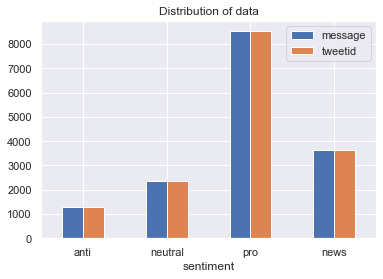

In [25]:
# Plotting the distribution for dataset.

ax = df_train.groupby('sentiment').count().plot(kind='bar', 
                                                title='Distribution of data',legend=True)
labels = df_train['sentiment'].unique()
ax.set_xticklabels(['anti','neutral', 'pro', 'news'], rotation = 0)
# Storing data in lists.
message, sentiment = list(df_train['message']), list(df_train['sentiment'])

> Clearly this shows there is an **imbalance in the frequency of occurrence** for each class. Imbalance occurs when there is an uneven distribution of the various observations. Since the training dataset has more observations for 'pro' and least observation for 'anti', this imbalance will likely produce a model that performs well on predicting 'pro' tweets and performs worse on predicting anti tweets. This shouldn't come as a surprise since our model was fed more with pro tweets and least with anti tweets.  Remember, for a dataset with imbalanced classes, something like F1-score is a better choice for model evaluation.

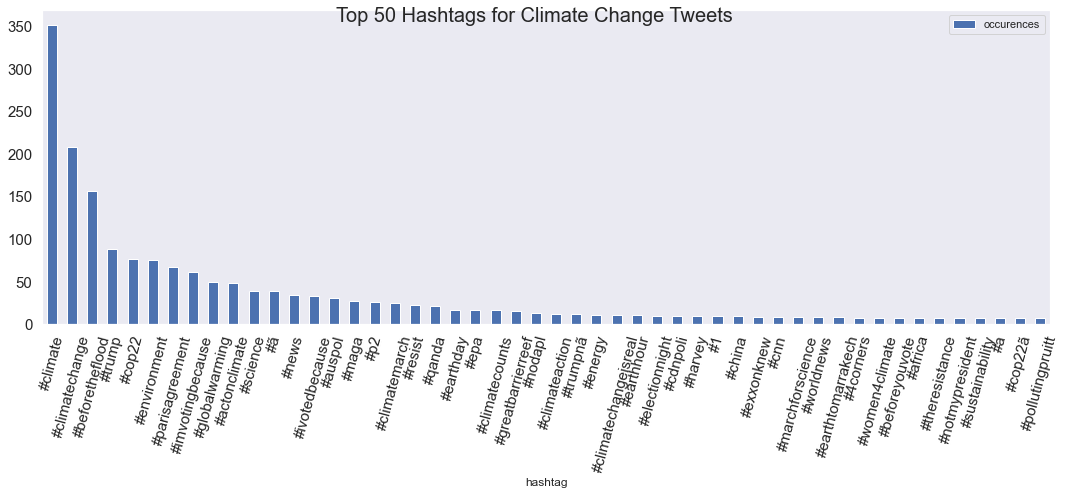

In [26]:
hashtags[:50].plot(fontsize=15,figsize  = (15,7), kind='bar',y='occurences',x='hashtag')
plt.xticks(rotation = 75)
plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 50 Hashtags for Climate Change Tweets', fontsize=20);

The chart above shows the frequencies of the top 50 hashtags of our data set, it shows that there is a high occurence difference in the hashtags contained in the data

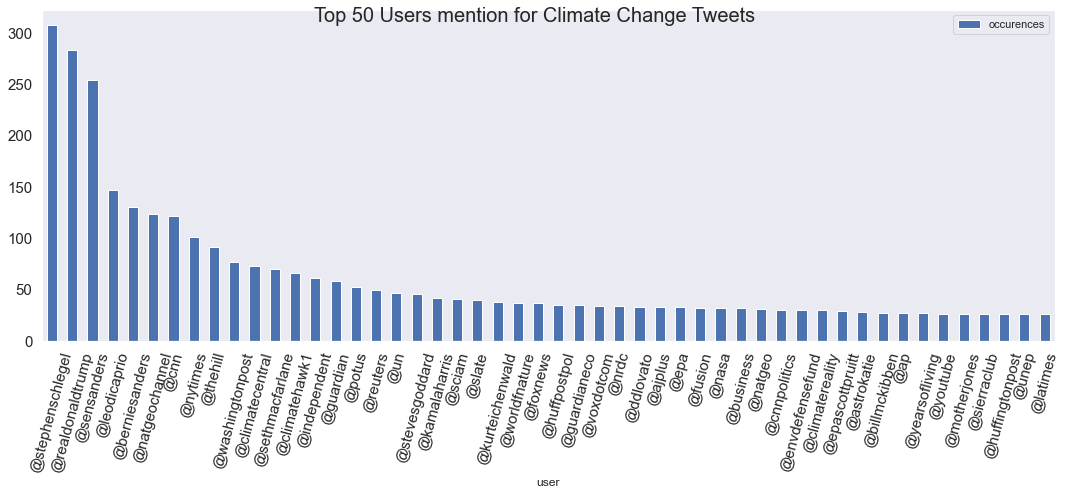

In [27]:
users[:50].plot(fontsize=15,figsize  = (15,7), kind='bar',y='occurences',x='user')
plt.xticks(rotation = 75)
plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 50 Users mention for Climate Change Tweets', fontsize=20);

This chart shows the top 50 users mentioned in climate change tweets of our data set, majority of the users have less than 50 mentions while there are 8 users with over 100 mentions

### Word Cloud

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.


In [28]:
# Start with one review:
#classifying the tweets into it's category class
pro = df_train[df_train['sentiment']==1]
neutral = df_train[df_train['sentiment']==0]
news = df_train[df_train['sentiment']==2]
anti = df_train[df_train['sentiment']==-1]

In [29]:
#looping through each category of the tweet and joining it as a string
all_tweets = " ".join(word for word in df_train.message)
pro_tweets = " ".join(word for word in pro.message)
neutral_tweets = " ".join(word for word in neutral.message)
news_tweets = " ".join(word for word in news.message)
anti_tweets = " ".join(word for word in anti.message)

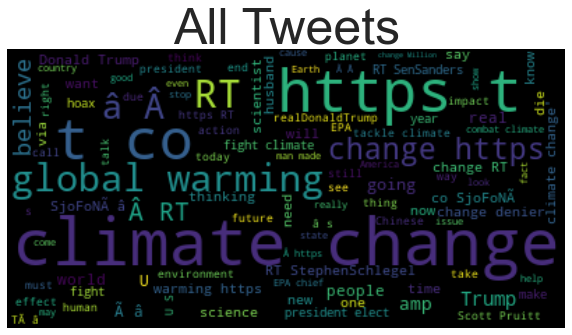

In [30]:
fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(all_tweets)
# Display the generated image:
ax.imshow(wordcloud_all, interpolation='bilinear')
ax.set_title('All Tweets', fontsize=50)
ax.axis('off');

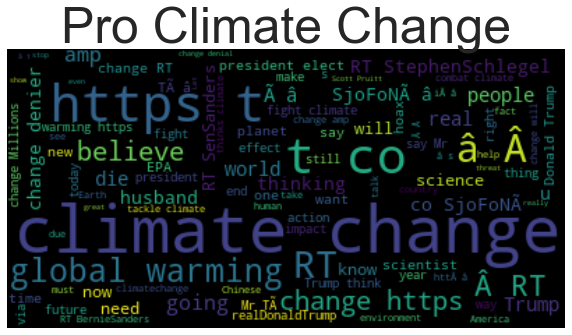

In [31]:
fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_pro = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(pro_tweets)
# Display the generated image:
ax.imshow(wordcloud_pro, interpolation='bilinear')
ax.set_title('Pro Climate Change',fontsize=50)
ax.axis('off');

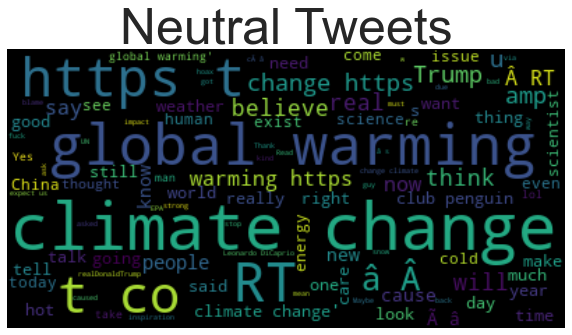

In [32]:
fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_neutral = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(neutral_tweets)
# Display the generated image:
ax.imshow(wordcloud_neutral, interpolation='bilinear')
ax.set_title('Neutral Tweets',fontsize=50)
ax.axis('off');

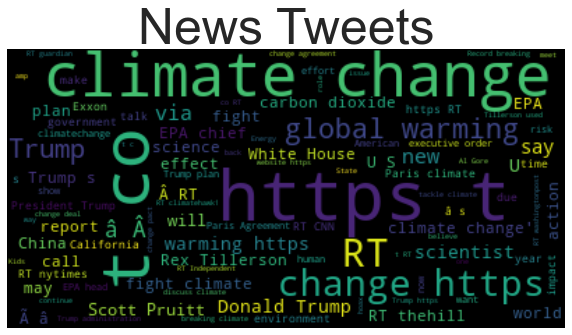

In [33]:
fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_news = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(news_tweets)
# Display the generated image:
ax.imshow(wordcloud_news, interpolation='bilinear')
ax.set_title('News Tweets',fontsize=50)
ax.axis('off');

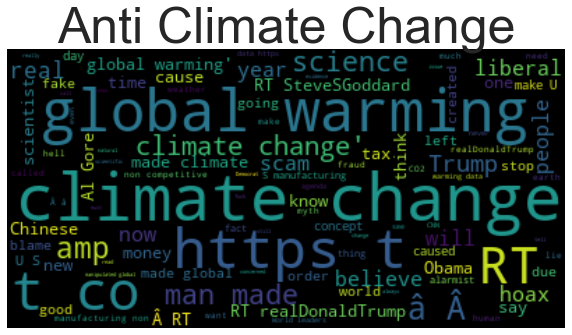

In [34]:
fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_anti = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(anti_tweets)
# Display the generated image:
ax.imshow(wordcloud_anti, interpolation='bilinear')
ax.set_title('Anti Climate Change',fontsize=50)
ax.axis('off');

- Words like "climate change" and "global warming" that are general terms connected to discussions about climate change appear in all categories.
- The performance of the classification model is likely to be unaffected by the removal of such stopwords and words that appear in all categories.
- Because the objective is to determine whether there is a positive sentiment or not, it is imperative to reduce the categories in the sentiment feature.

<a id="five"></a>
## 5. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


In this section of text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format.

<img src="https://imgs.search.brave.com/sxwy8lWRY4tbRTAWP5AcgKawD8y9mqR67LUK3ICd33A/rs:fit:768:432:1/g:ce/aHR0cHM6Ly9jZG4u/c2xpZGVzaGFyZWNk/bi5jb20vc3NfdGh1/bWJuYWlscy9kYXRh/cHJlcHJvY2Vzc2lu/Zy1zYW5kZWVwcGF0/aWwtMTkwMzA1MDg0/MjI3LXRodW1ibmFp/bC00LmpwZz9jYj0x/NTUxNzc1NjEz" width="400">

For the twitter dataset, the following steps will be carried out:

* removing punctuation
* repeating characters
* converting emoji's
* cleaning urls
* removing numbers
* convert text to lower case
* convert texts into tokens
* removing stopwords


The ***emoji_converter*** function will convert all emoji in the tweets to meaningful words, remove # from the hashtags and remove @ from the usernames

In [21]:
def emoji_converter(x):
    x = ' '.join([emoji.demojize(word) for word in x.split()]) #converting emoji to words
    x = re.sub(r'#', '', x) # Removing hashtags
    x = re.sub(r'@', '', x) # Removing @ character for handles
    #x = re.sub(r'([A-Za-z])\1{2,}', r'\1', x) #Character normalisation
    return x

The ***words_fix*** function will seperate combined/joint words, usernames and extract some words from the texts in the tweets

In [22]:
def words_fix(x):
    x = re.sub(r'climatechange', 'climate change ', x)
    x = re.sub(r'climatecentral', 'climate central ', x)
    x = re.sub(r'climatereality', 'climate reality ', x)
    x = re.sub(r'beforetheflood', 'before the flood ', x)
    x = re.sub(r'parisagreement', 'paris agreement ', x)
    x = re.sub(r'imvotingbecause', 'im voting because ', x)
    x = re.sub(r'globalwarming', 'global warming ', x)
    x = re.sub(r'actonclimate', 'act on climate ', x)
    x = re.sub(r'votedbecause', 'voted because ', x)
    x = re.sub(r'climatemarch', 'climate march ', x)
    x = re.sub(r'earthday', 'earth day ', x)
    x = re.sub(r'climatecounts', 'climate counts ', x)
    x = re.sub(r'greatbarrierreef', 'great barrier reef ', x)
    x = re.sub(r'climateaction', 'climate action ', x)
    x = re.sub(r'climatechangeisreal', 'climate change is real ', x)
    x = re.sub(r'earthhour', 'earth hour ', x)
    x = re.sub(r'electiontonight', 'election tonight ', x)
    x = re.sub(r'marchforscience', 'march for science ', x)
    x = re.sub(r'worldnews', 'world news ', x)
    x = re.sub(r'women4climate', 'women climate ', x)
    x = re.sub(r'beforeyouvote', 'before you vote ', x)
    x = re.sub(r'notmypresident', 'not my president ', x)
    x = re.sub(r'pollutingpruitt', 'polluting pruitt ', x)
    
    x = re.sub(r'exxonmobil', 'exxon mobil ', x)
    x = re.sub(r'greenpeace', 'green peace ', x)
    x = re.sub(r'ivoted', 'i voted ', x)
    x = re.sub(r'prisonplanet', 'prison planet ', x)
    x = re.sub(r'theeconomist', 'the economist ', x)
    x = re.sub(r'thinkprogress', 'think progress ', x)
    x = re.sub(r'yearsofliving', 'years of living ', x)
    
    x = re.sub(r'stephenschlegel', 'stephen schlegel ', x)
    x = re.sub(r'realdonaldtrump', 'real donald trump ', x)
    x = re.sub(r'sensanders', 'sen sanders ', x)
    x = re.sub(r'berniesanders', 'bernie sanders ', x)
    x = re.sub(r'kamalaharris', 'kamala harris ', x)
    x = re.sub(r'davidsirota', 'david sirota ', x)
    x = re.sub(r'epascottpruitt', 'epa scott pruitt ', x)
    x = re.sub(r'hillaryclinton', 'hillary clinton ', x)
    
    x = re.sub(r'.*\.news$', 'news ', x)
    x = re.sub(r'trump*\S+', 'trump ', x)
    x = re.sub(r'change*\S+', 'change ', x)
    x = re.sub(r'climate*\S+', 'climate ', x)
    x = re.sub(r'.*\.trump$', 'trump ', x)
    x = re.sub(r'.*\.change$', 'change ', x)
    x = re.sub(r'.*\.climate$', 'climate ', x)
    x = re.sub(r'world*\S+', 'world ', x)
    x = re.sub(r'.*\.world$', 'world ', x)
    return x

The ***clean_column*** function changes all the characters to lowercase, decode non alphanumeric characters, covert links to 'url', and removes punctuations

In [23]:
#function to remove noise from dataframe

def clean_column(column):
    #convert to lowercase()
    column = column.str.lower()
    #convert unicode characters into binary string
    column = column.str.encode('ascii', 'ignore').str.decode("utf-8")
    #removes web URL from text
    column = column.str.replace(r'https*\S+', 'url ', regex=True)
    #removes "\" from string
    column = column.str.replace(r'\'\w+', ' ', regex=True)
    
    column = column.str.replace(r'([A-Za-z])\1{2,}', r'\1', regex=True)
    # removes punctuation from string
    column = column.str.replace('[%s]' % re.escape(string.punctuation), ' ', regex=True)
    # removes numbers from string
    column = column.str.replace(r'\w*\d+\w*', ' ', regex=True)
    return column


COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


The ***text_preproc*** function changes all the contradictions (*e.g don't **to** do not **and** there's **to** there is*), and removes extra whitespaces

In [24]:
def text_preproc(x):
    x = ' '.join([contractions.fix(word) for word in x.split()])
    x = re.sub(' +', ' ', x)
    return x

In [25]:
#Applying the emoji_converter function to the specific df_train column
df_train['message'] = df_train.message.apply(emoji_converter)
df_test['message'] = df_test.message.apply(emoji_converter)

In [26]:
#Applying the clean_column function to the specific df column
df_train['message'] = clean_column(df_train['message'])
df_test['message'] = clean_column(df_test['message'])

In [27]:
#Applying the text_preproc function to the specific df column
df_train['clean_message'] = df_train.message.apply(text_preproc)
df_test['clean_message'] = df_test.message.apply(text_preproc)

In [28]:
#Applying the words_fix function to the specific df column
df_train['clean_message'] = df_train.clean_message.apply(words_fix)
df_test['clean_message'] = df_test.clean_message.apply(words_fix)

In [29]:
#Creating tokens to enable further analysis into the data set
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['clean_message'].apply(tokeniser.tokenize)

In [30]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [31]:
sentiment = {}
for pp in s_labels:
    df = df_train.groupby('sentiment')
    sentiment[pp] = {}
    for row in df.get_group(pp)['tokens']:
        sentiment[pp] = bag_of_words_count(row, sentiment[pp])

In [32]:
all_words = set()
for pp in s_labels:
    for word in sentiment[pp]:
        all_words.add(word)

In [33]:
sentiment['all'] = {}
for pp in s_labels:    
    for word in all_words:
        if word in sentiment[pp].keys():
            if word in sentiment['all']:
                sentiment['all'][word] += sentiment[pp][word]
            else:
                sentiment['all'][word] = sentiment[pp][word]

In [34]:
total_words = sum([v for v in sentiment['all'].values()])
total_words

279447

In [35]:
len([v for v in sentiment['all'].values() if v == 1])

12526

In [36]:
rare_words = [k for k, v in sentiment['all'].items() if v<=2] 

In [37]:
def rare_preproc(x):
    
    x = ' '.join([word for word in x.split(' ') if word not in rare_words])
    x = re.sub(' +', ' ', x)
    return x

In [38]:
#Apply the function to the specific df column and store the result in a new column
df_train['clean_message'] = df_train.clean_message.apply(rare_preproc)
df_test['clean_message'] = df_test.clean_message.apply(rare_preproc)

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


In [39]:
#Check df after removing noise
df_train.head()

,sentiment,message,tweetid,clean_message,tokens
0,1,polyscimajor epa chief doesn think carbon dio...,625221,epa chief doesn think carbon dioxide is main b...,"[polyscimajor, epa, chief, doesn, think, carbo..."
1,1,it not like we lack evidence of anthropogenic...,126103,it not like we lack evidence of anthropogenic ...,"[it, not, like, we, lack, evidence, of, anthro..."
2,2,rt rawstory researchers say we have three yea...,698562,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr..."
3,1,todayinmaker wired was a pivotal year in t...,573736,wired was a pivotal year in the war on climate...,"[todayinmaker, wired, was, a, pivotal, year, i..."
4,1,rt soynoviodetodas it and a racist sexis...,466954,rt it and a racist sexist climate change denyi...,"[rt, soynoviodetodas, it, and, a, racist, sexi..."


* After thorough cleaning and engineering new feature, the dataframe now has an extra columns containing texts to be used for modelling and making predictions.

The dataframe looks cleaned, pruned and proper. 

Next, convert the texts into tokens through a process called **tokenization**, remove stop words, **stemmatize** and **lemmatize** the tokens

* Tokenization is a way of separating a piece of text into smaller units called tokens, which can be either words, characters, or subwords.
* Stemmatization works by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word.

* Lemmatization, on the other hand, takes into consideration the contextual meaning of the words.


Instead of doing all the above named processes manually and one after the other, one can use a vectorizer to do it once.

<a id="six"></a>
## 6. Transforming Dataset using TF-IDF Vectorizer
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

TF-IDF is short for Term frequency-Inverse Document Frequency.

**TF** is a measure of how often a phrase appears in a document, and **IDF** is about how important that phrase is.
The TF-IDF algorithm is used to weigh a keyword in any content and assign importance to that keyword based on the number of times it appears in the document.

In [40]:
# create features and target dataset
x = np.array(df_train['clean_message'])
y = np.array(df_train['sentiment'])

**TF-IDF weighting**

In [41]:
#Create a TF-IDF object instance
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

**Create features and target variable**

<a id="seven"></a>
## 7. Splitting our data into Train and Test Subset
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

The **Pareto Principle** is also called the 80/20 rule. The general point is that, in most cases, 80% of effects come from 20% of causes. So we'll split our data according to this principle.

In [42]:
#Pareto Principle Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    random_state= 42)

<a id="eight"></a>
## 8. Model Building
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

---

This is the place where we create the main juice. This is the place for which all data preparation was done. We have hundreds of algorithms. These algorithms are developed by various researchers and most of them are freely available for our implementation.During model creation, we need to develop different models with different sets of hyperparameters. For model development, we need the following steps.

* Select an algorithm and create multiple models with their default hyperparameters.
* Establish metrics for model performance. Model performance metrics can be f1_score, accuracy, recall, precision, roc-auc, etc.
* create multiple models with a winning algorithm and fine tune hyperparameters.
* Check the model performance on the train dataset.



<img src="https://imgs.search.brave.com/kvRbwXzThu7-jN1wyZvQAlCG3OZm2LBm3kEqGkrE5Vo/rs:fit:1024:683:1/g:ce/aHR0cHM6Ly93d3cu/aW50YWNzLmNvbS93/cC1jb250ZW50L3Vw/bG9hZHMvMjAyMC8x/MC9idWlsZC1jdXN0/b20tbW9kZWxzLXdp/dGgtYXp1cmUtbWFj/aGluZS1sZWFybmlu/Zy1kZXNpZ25lci0x/MDI0eDY4My5qcGc" width="500" >

 We'll make use of the following models to classify the polarity of tweets present in our dataset;

* Naive Bayes
* LogisticsRegression Classifier
* DecisionTree Classifier
* RandomForest Classifier
* Support Vector Machine Classifier
* Linear Support Vector Machine Classifier
* Ridge Classifier

---

#### Create Multiple Models

In [43]:
# NaiveBayes classifier
nby = MultinomialNB()
# Train model
nby.fit(X_train, y_train)
# Make predictions
nby_pred = nby.predict(X_test)

In [44]:
#LogisticRegression classifier
lr = LogisticRegression()
# Train model
lr.fit(X_train, y_train)
# Make predictions
lr_pred = lr.predict(X_test)

In [45]:
#DecisionTree classifier
dtc = DecisionTreeClassifier()
# Train model
dtc.fit(X_train, y_train)
# Make predictions
dtc_pred = dtc.predict(X_test)

In [46]:
#RandomForest classifier
rf = RandomForestClassifier()
# Train model
rf.fit(X_train, y_train)
# Make predictions
rf_pred = dtc.predict(X_test)

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


In [47]:
#Support Vector Machine
svc = SVC(C=5)
# Train model
svc.fit(X_train, y_train)
# Make predictions
svc_pred = svc.predict(X_test)

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


In [48]:
#Linear Support Vector Machine
svm = LinearSVC(C=0.7)
# Train model
svm.fit(X_train, y_train)
# Make predictions
svm_pred = svm.predict(X_test)

In [49]:
#Ridge Classifier
rc = RidgeClassifier(alpha=2.5)
# Train model
rc.fit(X_train, y_train)
# Make predictions
rc_pred = rc.predict(X_test)

<a id="nine"></a>
## 9. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


<img src="https://imgs.search.brave.com/43umOrkBjx31omvA7djaPP7q95QPROyX4XIcXZreQGM/rs:fit:676:403:1/g:ce/aHR0cHM6Ly9jZG4u/c2hvcGlmeS5jb20v/cy9maWxlcy8xLzA3/MTQvNTA2MS9wcm9k/dWN0cy9UUFRFLTEw/MDMtVFAtTW9kZWxf/em9vbV81ODB4QDJ4/LmpwZz92PTE0MTg2/Mjg3MTM" width="400">

---

The metrics used to evaluate the performance of the various models are ;

1. Accuracy , Precision , Recall and F1 scores              
2. Confusion Matrix
3. Classification Report


**Accuracy** is the ratio of the correctly predicted classifications (both True Positives + True Negatives) to the total Test Dataset.

> In other words, accuracy answers the following question:
How many tweets did the model correctly classify out of all the tweets?

 **Precision** is the ratio of correctly predicted positive observations (True Positives) to the model’s total predicted positive observations, both correct (True Positives) and incorrect (False Positives).

> In other words, precision answers the following question:
How many of those tweets labelled by the model as 'Pro' are actually 'Pro' ?

 **Recall** is the ratio of correctly predicted positive observations (True Positives) to all observations in the actual class (Actual Positives).

> In other words, recall answers the following question:
Of all the tweets that are 'Pro', how many of those did the model correctly classify as 'Pro' ?

 
 **F1 score** is the weighted average of Precision and Recall. Therefore, this score takes both False Positives and False Negatives into account to strike a balance between precision and Recall. 
> F1 Score is a better measure to use if we need to seek a balance between Precision and Recall _and_ there is an uneven class distribution (remember our dataset contains large number of 'Pro' tweets compared to the rest class ).


### 9.1.  Assessing Model Performance using F1, Recall and Precision Scores

* Calculate the scores for the 7 models and display on a graph

In [50]:
print('     Performance metrics for Naive Bayes model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, nby_pred, average="micro"))
print('Recall score: ', recall_score(y_test, nby_pred, average="micro"))
print('Precison score: ', precision_score(y_test, nby_pred, average="micro"))
print('*' * 50)

     Performance metrics for Naive Bayes model
**************************************************
F1 score:  0.6946902654867256
Recall score:  0.6946902654867256
Precison score:  0.6946902654867256
**************************************************


In [51]:
print('     Performance metrics for Logistics model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, lr_pred, average="micro"))
print('Recall score: ', recall_score(y_test, lr_pred, average="micro"))
print('Precison score: ', precision_score(y_test, lr_pred, average="micro"))
print('*' * 50)

     Performance metrics for Logistics model
**************************************************
F1 score:  0.7487357774968394
Recall score:  0.7487357774968394
Precison score:  0.7487357774968394
**************************************************


In [52]:
print('     Performance metrics for Decision Tree model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, dtc_pred, average="micro"))
print('Recall score: ', recall_score(y_test, dtc_pred, average="micro"))
print('Precison score: ', precision_score(y_test, dtc_pred, average="micro"))
print('*' * 50)

     Performance metrics for Decision Tree model
**************************************************
F1 score:  0.618204804045512
Recall score:  0.618204804045512
Precison score:  0.618204804045512
**************************************************


In [53]:
print('     Performance metrics for Random Forest model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, rf_pred, average="micro"))
print('Recall score: ', recall_score(y_test, rf_pred, average="micro"))
print('Precison score: ', precision_score(y_test, rf_pred, average="micro"))
print('*' * 50)

     Performance metrics for Random Forest model
**************************************************
F1 score:  0.618204804045512
Recall score:  0.618204804045512
Precison score:  0.618204804045512
**************************************************


In [54]:
print('     Performance metrics for Support Vector Machine model')
print('*' * 60)
print('F1 score: ',f1_score(y_test, svc_pred, average="micro"))
print('Recall score: ', recall_score(y_test, svc_pred, average="micro"))
print('Precison score: ', precision_score(y_test, svc_pred, average="micro"))
print('*' * 60)

     Performance metrics for Support Vector Machine model
************************************************************
F1 score:  0.7664348925410872
Recall score:  0.7664348925410872
Precison score:  0.7664348925410872
************************************************************


In [55]:
print(' Performance metrics for Linear Support Vector Machine model')
print('*' * 60)
print('F1 score: ',f1_score(y_test, svm_pred, average="micro"))
print('Recall score: ', recall_score(y_test, svm_pred, average="micro"))
print('Precison score: ', precision_score(y_test, svm_pred, average="micro"))
print('*' * 60)

 Performance metrics for Linear Support Vector Machine model
************************************************************
F1 score:  0.7462073324905182
Recall score:  0.7462073324905183
Precison score:  0.7462073324905183
************************************************************


In [56]:
print('     Performance metrics for Ridge model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, rc_pred, average="micro"))
print('Recall score: ', recall_score(y_test, rc_pred, average="micro"))
print('Precison score: ', precision_score(y_test, rc_pred, average="micro"))
print('*' * 50)

     Performance metrics for Ridge model
**************************************************
F1 score:  0.7493678887484196
Recall score:  0.7493678887484198
Precison score:  0.7493678887484198
**************************************************


COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


### Let's visualize the scores on a bar chart

---

From the metrics above, the scores are the same so let's visualize the f1 score since it measures the weighted average of both recall and precision.

---

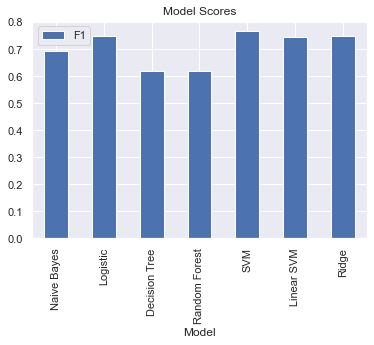

In [58]:
# Next, create a pandas DataFrame containing the precision, recall, and F1 scores for each model.    
    
scores = {
    "Model": ["Naive Bayes", "Logistic", "Decision Tree", "Random Forest", "SVM", "Linear SVM", "Ridge"],
    "F1": [f1_score(y_test, nby_pred, average="micro"), f1_score(y_test, lr_pred, average="micro"),
           f1_score(y_test, dtc_pred, average="micro"), f1_score(y_test, rf_pred, average="micro"), 
           f1_score(y_test, svc_pred, average="micro"), f1_score(y_test, svm_pred, average="micro"),
           f1_score(y_test, rc_pred, average="micro")],
}


df_scores = pd.DataFrame(scores)

# Use the DataFrame.plot.bar method to create the bar chart. 
# This method takes a few optional parameters that you can use to customize the chart, 
# such as the x, y, and title parameters to specify the data to plot, the labels for the axes,
# and the title for the chart, respectively.

ax = df_scores.plot.bar(x="Model", y=["F1"], title="Model Scores")

plt.show()

### 9.2. Assessing Model Performance using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. The number of rows and columns depend on the number of classes present in our dataset.

A few notes on the matrix:

* The matrix orders the rows and columns in a sorted fashion according to the labels. Our labels are -1, 0, 1 and 2, so the first row/column is -1, and the 2nd row/column is 0 and so on. Let's give it the appropriate labels.

* Each row represents the ground truth totals for Anti, Neutral, Pro, and News tweets. In other words, the sum of all the values in the first row is the total number of observations in our test dataset labelled 'Anti'.

* Each column represents the totals for the predictions in each class of Anti, Neutral, Pro and News tweets. In other words, the sum of all the values in the first column is the total number of predicted observations by the model as 'Anti'

* The intersection of each row/column gives the number of correctly predicted observation for that class.


Confusion matrices are useful for understanding how well a classification model is performing, as they provide a detailed breakdown of the model's predictions. They can be used to calculate a variety of evaluation metrics, such as precision, recall, and accuracy, which can help you understand the strengths and weaknesses of a model.

In [59]:
# Create categorical labels for -1, 0, 1 and 2
labels = ['-1: Anti', '0: Neutral', '1: Pro', '2: News']

In [60]:
#Confusion matrix for Naive Bayes
naive_matrix = pd.DataFrame(data=confusion_matrix(y_test, nby_pred), index=labels, columns=labels)
naive_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,25,7,235,11
0: Neutral,0,53,354,18
1: Pro,0,9,1671,75
2: News,1,2,254,449


COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


* From the matrix above, there are a total of 25+7+235+11 = 278 Anti tweets present i.e total from first row. Naive bayes model predicted a total of 25+1 = 26 Anti tweets i.e total from first column and only 25 of those predictions are correct. Similar explanations for the other class labels.


In [61]:
#Confusion matrix for LogisticsRegressor
logistics_matrix = pd.DataFrame(data=confusion_matrix(y_test, lr_pred), index=labels, columns=labels)
logistics_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,91,39,137,11
0: Neutral,8,166,227,24
1: Pro,12,58,1566,119
2: News,4,10,146,546


* From the matrix above, there are a total of 91+39+137+11 = 278 Anti tweets present i.e total from first row. Logistic model predicted a total of 91+8+12+4 = 115 Anti tweets i.e total from first column and only 91 of those predictions are correct. Similar explanations for the other class labels.


In [62]:
#Confusion matrix for DecisionTree 
dtc_matrix = pd.DataFrame(data=confusion_matrix(y_test, dtc_pred), index=labels, columns=labels)
dtc_matrix


,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,77,41,133,27
0: Neutral,21,160,201,43
1: Pro,74,171,1260,250
2: News,9,43,195,459


* Out of a total of 278 Anti tweets present i.e total from first row, Decision Tree model predicted a total of 159 Anti tweets  and only 68 of those predictions are correct. 

In [63]:
#Confusion matrix for RandomForest 
rf_matrix = pd.DataFrame(data=confusion_matrix(y_test,rf_pred), index=labels, columns=labels)
rf_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,77,41,133,27
0: Neutral,21,160,201,43
1: Pro,74,171,1260,250
2: News,9,43,195,459


* Out of a total of 278 Anti tweets present i.e total from first row, Random forest model predicted a total of 159 Anti tweets and only 68 of those predictions are correct. Similar explanations for the other class labels.

In [64]:
#Confusion matrix for Support Vector Machine 
svc_matrix = pd.DataFrame(data=confusion_matrix(y_test,svc_pred), index=labels, columns=labels)
svc_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,118,32,120,8
0: Neutral,12,172,219,22
1: Pro,9,64,1574,108
2: News,2,10,133,561


* Out of a total of 278 Anti tweets present in the testing data set, SVM model predicted a total of 141 Anti tweets and only 118 of those predictions are correct. Similar explanations for the other class labels.

In [65]:
#Confusion matrix for Linear Support Vector Machine 
svm_matrix = pd.DataFrame(data=confusion_matrix(y_test,svm_pred), index=labels, columns=labels)
svm_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,127,41,98,12
0: Neutral,17,188,190,30
1: Pro,27,104,1494,130
2: News,4,19,131,552


* Out of a total of 278 Anti tweets present in the testing data set, Linear SVM model predicted a total of 175 Anti tweets and only 127~ of those predictions are correct. Similar explanations for the other class labels.

In [66]:
#Confusion matrix for Ridge 
rc_matrix = pd.DataFrame(data=confusion_matrix(y_test,rc_pred), index=labels, columns=labels)
rc_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,99,42,123,14
0: Neutral,5,160,229,31
1: Pro,8,56,1551,140
2: News,3,8,134,561


* Out of a total of 278 Anti tweets present in the testing data set, ridge classifier model predicted a total of 114 Anti tweets and only 98 of those predictions are correct. Similar explanations for the other class labels.

* The number of correct predictions for the Pro class is higher in all 7 models, and this has to do with the class imbalance we referred to earlier in the EDA. There are more observations with the Pro label, so the model gets better at classifiying those ones because it has more evidence of them.

* The corresponding values in the other classes are lower for the same reason

#### Explanation of Overall Accuracy from Confusion Matrix

The results shown above lead us to our first classification metric: **overall accuracy**, which we calculate according to the following formula:

$$ Accuracy =  \frac{Correct\space predictions\space in\space all\space classes}{Total\space predictions} $$


$$ Naive-Accuracy =   \frac{ 25 + 53 + 1671 + 449 }{ 3164 } = 0.6946903 $$

$$ Logistics-Accuracy =   \frac{ 91 + 166 + 1566 + 546 }{ 3164 } = 0.7487358 $$

$$ DecisionTree-Accuracy =   \frac{ 68 + 160 + 1248 + 468 }{ 3164 } = 0.6144121 $$

$$ RandomForest-Accuracy =   \frac{  68 + 160 + 1248 + 468 }{ 3164 } = 0.6144121 $$

$$ SVM-Accuracy =   \frac{ 118 + 172 + 1574 + 561 }{ 3164} = 0.7664349 $$

$$ Linear-SVM-Accuracy =   \frac{ 127 + 188 + 1494 + 552 }{ 3164 } = 0.7462073 $$

$$ Ridge-Accuracy =   \frac{ 98 + 160 + 1553 + 561 }{ 3164 } = 0.7496839 $$


At first glance this appears to be a useful, catch-all metric which tells us everything we need to know about our model. The problem is that it lacks detail. It only tells us the overall accuracy but tells nothing about the accuracy of each particular class.

### 9.3. Assessing Model Performance, for 3 models, using the Classification Report 

In [67]:
print('Classification Report For Naive Bayes')
print(classification_report(y_test, nby_pred, target_names=['Anti', 'Neutral', 'Pro', 'News']))

Classification Report For Naive Bayes
              precision    recall  f1-score   support

        Anti       0.96      0.09      0.16       278
     Neutral       0.75      0.12      0.21       425
         Pro       0.66      0.95      0.78      1755
        News       0.81      0.64      0.71       706

    accuracy                           0.69      3164
   macro avg       0.80      0.45      0.47      3164
weighted avg       0.73      0.69      0.64      3164



In [68]:
print('Classification Report For Logistic Model')
print(classification_report(y_test, lr_pred, target_names=['Anti', 'Neutral', 'Pro', 'News']))

Classification Report For Logistic Model
              precision    recall  f1-score   support

        Anti       0.79      0.33      0.46       278
     Neutral       0.61      0.39      0.48       425
         Pro       0.75      0.89      0.82      1755
        News       0.78      0.77      0.78       706

    accuracy                           0.75      3164
   macro avg       0.73      0.60      0.63      3164
weighted avg       0.74      0.75      0.73      3164



In [69]:
print('Classification Report For Support Vector Machine')
print(classification_report(y_test, svc_pred, target_names=['Anti', 'Neutral', 'Pro', 'News']))

Classification Report For Support Vector Machine
              precision    recall  f1-score   support

        Anti       0.84      0.42      0.56       278
     Neutral       0.62      0.40      0.49       425
         Pro       0.77      0.90      0.83      1755
        News       0.80      0.79      0.80       706

    accuracy                           0.77      3164
   macro avg       0.76      0.63      0.67      3164
weighted avg       0.76      0.77      0.75      3164



COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


#### Interpretation

We now have a far more comprehensive view of the performance of our model.

- Clearly, the precision, recall and f1-score values for the Pro class are higher, and this has to do with the class imbalance we referred to earlier in the EDA. There are more observations with the Pro label, so the model gets _better_ at classifiying those ones because it has more evidence of them.

- The corresponding values in the other classes are lower for the same reason.

- The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class , but slightly in favour of class Pro, of which there were more examples.

- Perhaps the most important information in the above table is in the last row, indicating the weighted average. unlike the values in the `macro avg` row which are computed using: $\frac{class\_0\_metric \quad + \quad class\_1\_metric + \quad class\_2\_metric + \quad class\_-1\_metric}{4}$ , the `weighted avg` values are computed using: $\frac{class\_0\_metric \, \times \, \%\_class\_0\_labels  \quad + \quad class\_1\_metric \, \times \, \%\_class\_1\_labels + \quad class\_2\_metric \, \times \, \%\_class\_2\_labels + \quad class\_-1\_metric \, \times \, \%\_class\_-1\_labels}{4}$ , which takes into account the proportions of each class fed into the model (as indicated in the support column).

<a id="ten"></a>
## 10. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

**HOW OUR MODEL WORKS!**

<img src="https://imgs.search.brave.com/ybiWe82h0sdQRbZJEMWV3sNRCvZHHux_rxtkuKNcVLg/rs:fit:900:604:1/g:ce/aHR0cDovL3d3dy5s/aWZlY3ljbGVpbnNp/Z2h0cy5jb20vd3At/Y29udGVudC91cGxv/YWRzLzIwMTYvMDQv/cGFydC1hbmQtZHJh/d2luZy5wbmc" width="400">


#### 10.1 Multinomial Naive Bayes

> _Non-technical summary_:
Naive Bayes is a way of using math to make predictions about data. It is called "naive" because it assumes that the different factors that can affect the outcome of a situation are independent of each other. This assumption might not always be true, but the algorithm is often still very accurate. It is often used to classify things into different groups.

> _Technical summary_:
Naive Bayes is a supervised learning algorithm that is commonly used for classification tasks. It uses Bayes' theorem, which is a way of calculating the probability of an event based on prior knowledge of conditions that might be related to the event. In the context of the algorithm, this means that we can use the observed features of a data point to calculate the probability that it belongs to a certain class. The "naive" part of the algorithm comes from the assumption that all of the features are independent of each other, which allows us to simplify the calculations. Despite this assumption, the algorithm often performs well in practice.

#### 10.2 Logistic Regression

> _Non-technical summary_:
Logistic regression is a way of using math to make predictions about data. It is often used to classify things into different groups, such as "spam" or "not spam" for emails, or "malignant" or "benign" for tumors. It works by taking some information about an input, and using it to calculate the probability that the input belongs to a certain group. It then uses a threshold value to decide which group the input should belong to.

> _Technical summary_:
Logistic regression is a supervised learning algorithm that is commonly used for classification tasks. It works by using a linear model to predict the probability that an input belongs to a certain class. This probability is calculated using a logistic function, which maps the input values to a value between 0 and 1. The class that the input is assigned to is then determined using a threshold value; for example, if the probability is greater than 0.5, the input might be classified as belonging to the "positive" class, and if it is less than 0.5, it might be classified as belonging to the "negative" class. The model is trained using a set of labeled examples, and can then be applied to new, unseen data to make predictions.

#### 10.3 Decision Tree

> _Non-technical summary_:
A decision tree is a tool that can help us make predictions about data. It does this by breaking the data into smaller and smaller groups, and then using those groups to make predictions. This lets us see how different factors might affect the outcome of a situation, and helps us make more accurate predictions.

> _Technical summary_:
A decision tree is a supervised learning algorithm that can be used for both classification and regression tasks. It works by constructing a tree-like model from an input dataset, where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or a predicted value. The algorithm uses a top-down, greedy search approach to find the optimal decision tree that maximizes a given criterion, such as information gain or Gini impurity.

#### 10.4 Random Forest

> Non-technical summary: A random forest model can be thought of as a group of individual decision trees that work together to make predictions. Each tree makes its own prediction, and the final prediction is made by combining the predictions of all of the trees. This approach helps to improve the accuracy of the model by reducing overfitting and using a variety of different perspectives to make a prediction.

> _Technical summary_: The working principle of a random forest model can be explained as follows:
1.The dataset is split into multiple subsets, and a decision tree is trained on each subset.
2.The features in the data are also randomly subsampled for each tree. This means that each tree is trained on a different subset of the features in the data.
3.During training, each decision tree is constructed using a greedy algorithm, where at each step the best split is chosen based on some metric (e.g., Gini impurity or entropy).
4.The final prediction for a new sample is made by averaging the predictions of all of the individual decision trees (for regression tasks) or by taking a majority vote (for classification tasks).

* The randomness in the subsampling of the data and the features helps to improve the generalization performance of the model by reducing overfitting.





#### 10.5  Support Vector Machine

> _Non-technical summary_:
Imagine you have a dataset with two classes of points, "A" and "B." An SVM will find the line that best separates these points into classes "A" and "B." Points on one side of the line will be classified as "A," and points on the other side will be classified as "B."

* Technical summary:

Our model works by finding an optimal boundary/line that successfully classifies the data points into their respective classes.
To better understand this, we'll quickly explain two terms; _hyperplane_ and _support vectors_ .

* **Hyper-Plane** : A hyperplane is a decision boundary that differentiates classes in SVM. A data point falling on either side of the hyperplane can be attributed to different classes. 

* **Support-Vectors** : Support vectors are the data points that are nearest to the hyper-plane. We have to select a hyperplane, for which the margin, i.e the distance between support vectors and hyper-plane is maximum.
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/support-vector.png" width="300">

Let's say we have a classification problem where we have to separate the red data points from the blue ones using a hyperplane. As shown in the image below, we have multiple lines separating the data points successfully. But our objective is to look for the **best line** that separate these datapoints equally.
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-08-13-18-50.png" width="300">

1. The **best line** must be able to successfully divide all the data points into the respective classes. In our example, we can clearly see lines E and D are miss classifying a red data point, so we drop them. 

2. The **best line** must perfectly separate the data points in such a way that both classes are at equidistant from the line. 
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-08-13-34-04.png" width="300">

> This is what Support Vector Classifier looks for. It aims for the maximum margin and creates a line that is equidistant from both sides, which is line C in our case. So we can say C represents the Support Vector Machine classifier with the maximum margin. This way our model is able to correctly classifier the tweets. 

---

#### 10.6 Linear Support Vector Machine

> _Non-technical summary_:
A linear SVM is an algorithm that finds the best line (in two dimensions) or hyperplane (in multiple dimensions) to separate the data points in a dataset into their respective classes. This line or hyperplane is known as the "decision boundary," and it is used to classify new data points.

> _Technical summary_:
A linear SVM finds the decision boundary by constructing a hyperplane that maximally separates the data points in the dataset. This is done by finding the hyperplane that has the largest margin, or the maximum distance between the hyperplane and any data point in the dataset. The points that are closest to the hyperplane are called "support vectors," and they define the position and orientation of the hyperplane. Because a linear SVM uses a linear kernel function, the decision boundary will always be a straight line or hyperplane. Once the decision boundary has been found, new data points can be easily classified by determining on which side of the hyperplane they lie.

#### 10.7 Ridge Classifier

> _Non-technical summary_:
A ridge classifier is an algorithm that helps to prevent overfitting by adding a regularization term to the model. This regularization term reduces the complexity of the model and can improve the accuracy of the classifier on new data.

> _Technical summary_:
A ridge classifier is a linear model that uses a regularization term in the cost function to prevent overfitting. This regularization term is a hyperparameter that is multiplied by the squared magnitude of the model weights, which penalizes large weights and encourages the model to use only the most relevant features in the data. During training, the model seeks to minimize the cost function, which balances the fit of the model on the training data and the regularization term. The regularization term helps to prevent overfitting by limiting the complexity of the model, which can improve the generalizability of the classifier.

<a id="eleven"></a>
## 11. Logging parameters on Comet
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

**Create a dictionary for the data we want to log**

In [70]:
params = {"random_state": 42,
         "model_type": "naive_bayes",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics = {"f1": f1_score(y_test, nby_pred, average="micro"),
          "recall": recall_score(y_test, nby_pred, average="micro"),
          "precision": precision_score(y_test, nby_pred, average="micro")
          }

In [74]:
params_1 = {"random_state": 42,
         "model_type": "logistic",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_1 = {"f1": f1_score(y_test, lr_pred, average="micro"),
          "recall": recall_score(y_test, lr_pred, average="micro"),
          "precision": precision_score(y_test, lr_pred, average="micro")
          }

In [78]:
params_2 = {"random_state": 42,
         "model_type": "decision tree",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_2 = {"f1": f1_score(y_test, dtc_pred, average="micro"),
          "recall": recall_score(y_test, dtc_pred, average="micro"),
          "precision": precision_score(y_test, dtc_pred, average="micro")
          }

In [82]:
params_3 = {"random_state": 42,
         "model_type": "random forest",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_3 = {"f1": f1_score(y_test, rf_pred, average="micro"),
          "recall": recall_score(y_test, rf_pred, average="micro"),
          "precision": precision_score(y_test, rf_pred, average="micro")
          }

In [86]:
params_4 = {"random_state": 42,
         "model_type": "svm",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_4 = {"f1": f1_score(y_test, svc_pred, average="micro"),
          "recall": recall_score(y_test, svc_pred, average="micro"),
          "precision": precision_score(y_test, svc_pred, average="micro")
          }

In [90]:
params_5 = {"random_state": 42,
         "model_type": "linear svm",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_5 = {"f1": f1_score(y_test, svm_pred, average="micro"),
          "recall": recall_score(y_test, svm_pred, average="micro"),
          "precision": precision_score(y_test, svm_pred, average="micro")
          }

In [94]:
params_6 = {"random_state": 42,
         "model_type": "ridge",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_6 = {"f1": f1_score(y_test, rc_pred, average="micro"),
          "recall": recall_score(y_test, rc_pred, average="micro"),
          "precision": precision_score(y_test, rc_pred, average="micro")
          }

**Log the parameters and result**

In [71]:
# Log of parameters for naive bayes
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(y_test, nby_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=026bd24666f44a6a848ae39bd560771b&experimentKey=f7a997fa77b44e4486efbed46a78d149',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=026bd24666f44a6a848ae39bd560771b&experimentKey=f7a997fa77b44e4486efbed46a78d149',
 'assetId': '026bd24666f44a6a848ae39bd560771b'}

In [75]:
# Log of parameters for logistic
experiment.log_parameters(params_1)
experiment.log_metrics(metrics_1)
experiment.log_confusion_matrix(y_test, lr_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=c161ab81f5d64ca0a648993dd93827a9&experimentKey=376d4cf2b74947eaa6cde8491dd9ec34',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=c161ab81f5d64ca0a648993dd93827a9&experimentKey=376d4cf2b74947eaa6cde8491dd9ec34',
 'assetId': 'c161ab81f5d64ca0a648993dd93827a9'}

In [79]:
# Log of parameters for decision tree
experiment.log_parameters(params_2)
experiment.log_metrics(metrics_2)
experiment.log_confusion_matrix(y_test, dtc_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=072503e4bb4b413481f32377ed895380&experimentKey=17ca726f55d54bedb8eaf0f17b5b3794',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=072503e4bb4b413481f32377ed895380&experimentKey=17ca726f55d54bedb8eaf0f17b5b3794',
 'assetId': '072503e4bb4b413481f32377ed895380'}

In [83]:
# Log of parameters for random forest
experiment.log_parameters(params_3)
experiment.log_metrics(metrics_3)
experiment.log_confusion_matrix(y_test, rf_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=cccc7d2d03c044eeb8acfc9d380353a1&experimentKey=146b1c14de8847d0bd430e95c9e038b9',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=cccc7d2d03c044eeb8acfc9d380353a1&experimentKey=146b1c14de8847d0bd430e95c9e038b9',
 'assetId': 'cccc7d2d03c044eeb8acfc9d380353a1'}

In [87]:
# Log of parameters for svc
experiment.log_parameters(params_4)
experiment.log_metrics(metrics_4)
experiment.log_confusion_matrix(y_test, svc_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=d008b5a94bbc4693a982a075b737e627&experimentKey=738a4661b74b42c6a9c062acaf9333bf',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=d008b5a94bbc4693a982a075b737e627&experimentKey=738a4661b74b42c6a9c062acaf9333bf',
 'assetId': 'd008b5a94bbc4693a982a075b737e627'}

In [91]:
# Log of parameters for linear svm
experiment.log_parameters(params_5)
experiment.log_metrics(metrics_5)
experiment.log_confusion_matrix(y_test, svm_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=e63117f60bb44f50a0751c4a5288a88b&experimentKey=d0ebbe182d8f4559a05b4f0d8ac9cbaa',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=e63117f60bb44f50a0751c4a5288a88b&experimentKey=d0ebbe182d8f4559a05b4f0d8ac9cbaa',
 'assetId': 'e63117f60bb44f50a0751c4a5288a88b'}

In [95]:
# Log of parameters for ridge
experiment.log_parameters(params_6)
experiment.log_metrics(metrics_6)
experiment.log_confusion_matrix(y_test, rc_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=237d1c01e36643119bf8bc4074b82880&experimentKey=9a5cc27854c94d10b491483eef335734',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=237d1c01e36643119bf8bc4074b82880&experimentKey=9a5cc27854c94d10b491483eef335734',
 'assetId': '237d1c01e36643119bf8bc4074b82880'}

**End experiment**

In [97]:
# end the expereiment
experiment.end()

**Display experiment**

Running experiment.display() will show you your experiments comet.ml page inside your notebook

In [98]:
# display the experiment
experiment.display()

<a id="twelve"></a>
## 12. Pickling of models and vectorizer 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

### Pickle three of the models for use on streamlit

In [106]:
# Pickle for LogisticRegressor
model_save_path = "logistics_regression.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lr,file)
    
#Pickle for DecisionForest Regressor
model_save_path = "dtc_regression.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(dtc,file)
    
#Pickle for DecisionForest Regressor
model_save_path = "svm_regression.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svm,file)

### Pickle the Vectorizer for use on streamlit

In [107]:
#Pickle the TFIDF vectorizer
model_save_path = "TFIDF.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(vectorizer,file)

<a id="thirteen"></a>
## 13. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

In this project, seven (7) machine learning models were trained for a tweet sentiment task. The performance of the models was evaluated using the f1 score, precisiona and recall and it was found that the **Support Vector Machine** model performed better than the other 6 models. This suggests that the **Support Vector Machine** model may be a good choice for this particular tweet polarity analysis. Further evaluation and testing may be needed to confirm this, but the initial results, based on the classification report given above for all seven (7) models judging by their respective f1 scores, indicate that the **Support Vector Machine** model is a strong performer in this domain.

Going by all of the above considerations, our winning model for this project is the **Support Vector Classifier** because it has the highest weighted average for precision, recall and f1 score.

With this model,  decision makers can known the prevailing sentiments from a particular area through analysing the statements from respondents living in a particular area. Armed with this knowledge, informed decisons on allocation of resources can be made, and ad and marketing strategies for different product that favours climate change can be put into action. 

The speech writing industry can also benefit greatly from product developed with this model. Imagine a politician or business executive that wants to bring in a policy about climate change, the executuve or politician can analyse his or her speech before hand to know the sentiment that the speech will arouse in his or her listeners and necessary corrections can be made to suit their agenda. 

## Test on Unseen Dataset for Kaggle submission

In [108]:
X_tests = vectorizer.transform(df_test['clean_message']).toarray()
test_new = pd.DataFrame(X_tests, columns=vectorizer.get_feature_names())
print(test_new.shape)

(10546, 6103)


In [109]:
X_test = test_new.values
svc_pred = svc.predict(X_test)

In [110]:
# Preparing csv file for Kaggle submission 
submission = pd.DataFrame()
submission['tweetid'] = df_test['tweetid']
submission['sentiment'] = svc_pred
submission.to_csv('tweet_submission.csv', index=False)

# Validate
submission = pd.read_csv('tweet_submission.csv')

<a id="fourteen"></a>
## 14. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

1. Wikipedia contributors. (2022, December 5). Exploratory data analysis. In Wikipedia, The Free Encyclopedia. Retrieved 03:31, December 9, 2022, from https://en.wikipedia.org/w/index.php?title=Exploratory_data_analysis&oldid=1125714900

2. BoostLabs (2020, June 22). Word Clouds & the Value of Simple Visualizations. https://boostlabs.com/blog/what-are-word-clouds-value-simple-visualizations/

3. Lawtomated. (2021, Nov 15). 4 things you need to know about AI: accuracy, precision, recall and F1 scores. https://lawtomated.com/accuracy-precision-recall-and-f1-scores-for-lawyers/

4. Analyticsvidhya.com. (2021, March 8). Beginners Guide To Support Vector Machine svm/ https://www.analyticsvidhya.com/blog/2021/03/beginners-guide-to-support-vector-machine-svm/

5. George Lawton. (2020, March 27). How to optimize hyperparameter tuning for machine learning models. https://searchenterpriseai.techtarget.com/feature/How-to-optimize-hyperparameter-tuning-for-machine-learning-mo

6. Hayley Dorney. (2021, October 10) How to create and use hashtags. Retrieved 12:53, December 11, 2022.
https://business.twitter.com/en/blog/how-to-create-and-use-hashtags.html

7. ANAMIKA THANDA (2022, February 15) What is Logistic Regression? A Beginner's Guide, UPDATED ON DECEMBER 7, 2022
https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/

8. Decision Tree - GeeksforGeeks https://www.geeksforgeeks.org/decision-tree/

9. Multinomial Naive Bayes Explained: Function, Advantages & Disadvantages, Applications in 2023 | upGrad blog by Shriram Last Updated: Oct 3, 2022 https://www.upgrad.com/blog/multinomial-naive-bayes-explained/

10.  Towards Data Science. (Apr 23, 2019) Ensemble methods: bagging, boosting and stacking by Joseph Rocca. 
https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

11. Towards Data Science by Destin Gong. (2022, Feb 23) Top 6 Machine Learning Algorithms for Classification https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

12. Medium by Avinash Navlani. (2020, Aug 16) Support Vector Machine Classification in Scikit-learn https://avinashnavlani.medium.com/support-vector-machine-classification-in-scikit-learn-3800bc4979ce)

